# 🌤️ Weather Data Analysis.

### 🎯 Project Objective
The objective of this analysis is to explore and understand the relationships between various weather conditions, such as temperature, humidity, wind speed, visibility, and atmospheric pressure. By analyzing these variables, we aim to identify patterns and trends that could be valuable for weather forecasting and understanding environmental conditions

#### 🛠️ Step 1: Import Necessary Libraries

In [13]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [77]:
import numpy as np

#### 📥 Step 2: Load the Dataset

In [19]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\Python Data Analysis\Weather Dataset.csv")

#### Display the first few rows of the dataset

In [25]:
print(data.head())

          Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  01/01/2012 00:00    -1.8              -3.9         86                4   
1  01/01/2012 01:00    -1.8              -3.7         87                4   
2  01/01/2012 02:00    -1.8              -3.4         89                7   
3  01/01/2012 03:00    -1.5              -3.2         88                6   
4  01/01/2012 04:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


#### 🔍 Step 3: Data Overview

#### Check the data types of each column and identify missing values

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


#### Display the summary statistics for numerical columns

In [35]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


#### 🧹 Step 4: Data Cleaning and Type Conversion

##### Checking for missing values

In [40]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

### 🔎 Data Analysis and Visualization

### 1. 🌡️ Temperature Analysis

#### Finding the highest and lowest temperatures recorded

In [73]:
max_temp = data['Temp_C'].max()
min_temp = data['Temp_C'].min()
max_temp_date = data[data['Temp_C'] == max_temp]['Date/Time'].values[0]
min_temp_date = data[data['Temp_C'] == min_temp]['Date/Time'].values[0]

In [79]:
(max_temp, max_temp_date), (min_temp, min_temp_date)

((33.0, numpy.datetime64('2012-06-21T15:00:00.000000000')),
 (-23.3, numpy.datetime64('2012-01-15T08:00:00.000000000')))

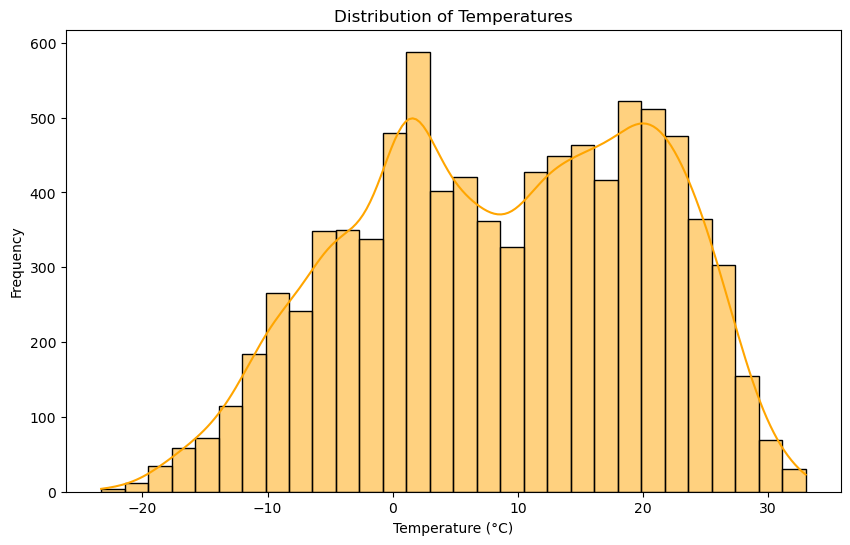

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Temp_C'], bins=30, kde=True, color='orange')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

### 2. 💧 Temperature vs. Relative Humidity

#### Checking the relationship between Temperature and Relative Humidity

In [95]:
temp_humidity_corr = data['Temp_C'].corr(data['Rel Hum_%'])
temp_humidity_corr

-0.22018192309198523

#### Visualization: Scatter Plot of Temperature vs. Humidity

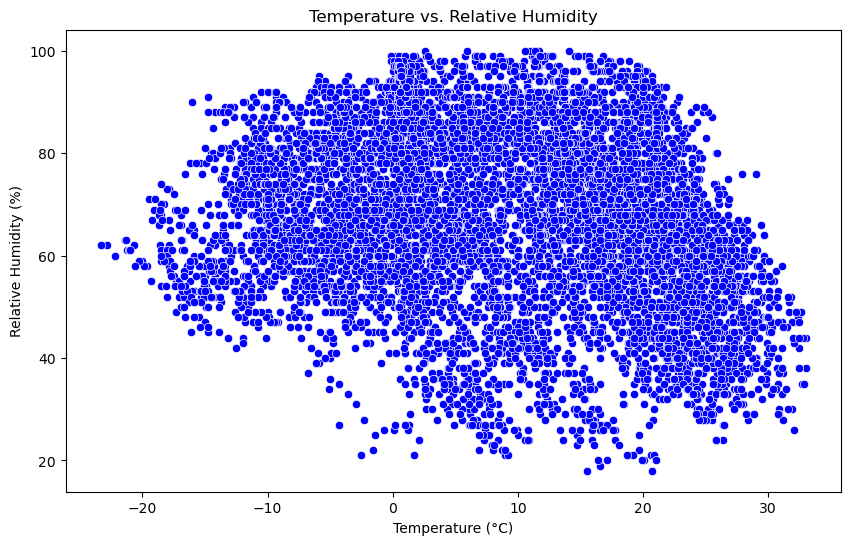

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_C', y='Rel Hum_%', data=data, color='blue')
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

### 3.💨 Wind Speed and Temperature Analysis

#### Wind speed on the hottest day

In [107]:
wind_speed_max_temp = data[data['Temp_C'] == max_temp]['Wind Speed_km/h'].values[0]

#### Wind speed on the coldest day

In [112]:
wind_speed_min_temp = data[data['Temp_C'] == min_temp]['Wind Speed_km/h'].values[0]

In [114]:
(wind_speed_max_temp, wind_speed_min_temp)

(24, 7)

### Visualization: Wind Speed Distribution

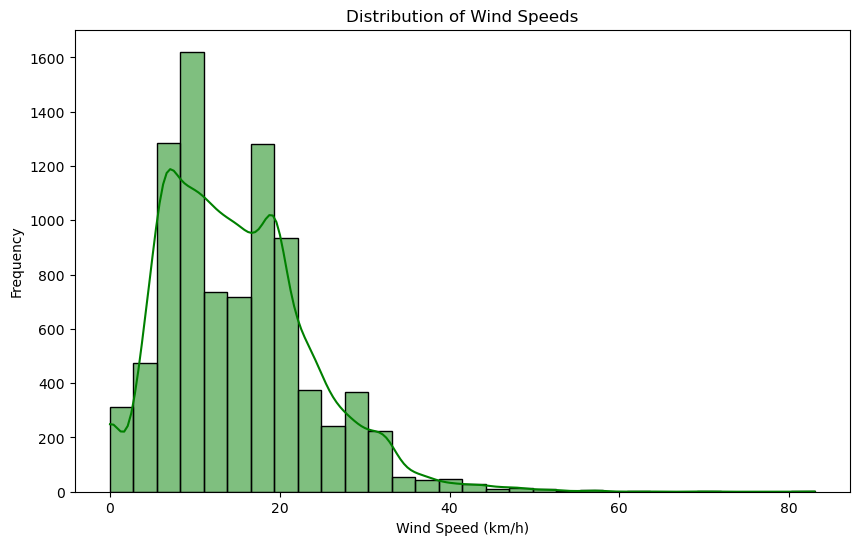

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Wind Speed_km/h'], bins=30, kde=True, color='green')
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

## 4. 👀 Visibility and Temperature Analysis

#### Visibility on the hottest day

In [125]:
visibility_max_temp = data[data['Temp_C'] == max_temp]['Visibility_km'].values[0]

#### Visibility on the coldest day

In [130]:
visibility_min_temp = data[data['Temp_C'] == min_temp]['Visibility_km'].values[0]

In [132]:
(visibility_max_temp, visibility_min_temp)

(24.1, 24.1)

### 5. 📊 Atmospheric Pressure Analysis

#### Atmospheric pressure on the hottest day

In [143]:
pressure_max_temp = data[data['Temp_C'] == max_temp]['Press_kPa'].values[0]

#### Atmospheric pressure on the coldest day

In [148]:
pressure_min_temp = data[data['Temp_C'] == min_temp]['Press_kPa'].values[0]

In [150]:
(pressure_max_temp, pressure_min_temp)

(100.2, 102.45)

### 6. 📅 Seasonal Analysis of Temperature

#### Extracting the month from the Date/Time column

In [161]:
data['Month'] = data['Date/Time'].dt.month

#### Calculating the average temperature per month

In [166]:
avg_temp_by_month = data.groupby('Month')['Temp_C'].mean()

In [168]:
avg_temp_by_month

Month
1     -7.371505
2     -4.225000
3      3.121237
4      7.009306
5     16.237769
6     20.134028
7     22.790054
8     22.279301
9     16.484444
10    10.954973
11     0.931389
12    -3.306317
Name: Temp_C, dtype: float64

In [172]:
import calendar

In [176]:
data['Month'] = data['Date/Time'].dt.month
data['Month_Name'] = data['Month'].apply(lambda x: calendar.month_name[x])

#### Calculating the average temperature per month by name

In [181]:
avg_temp_by_month_name = data.groupby('Month_Name')['Temp_C'].mean()

#### To ensure the months are in the correct order

In [184]:
avg_temp_by_month_name = avg_temp_by_month_name.reindex(calendar.month_name[1:])

In [186]:
avg_temp_by_month_name

Month_Name
January      -7.371505
February     -4.225000
March         3.121237
April         7.009306
May          16.237769
June         20.134028
July         22.790054
August       22.279301
September    16.484444
October      10.954973
November      0.931389
December     -3.306317
Name: Temp_C, dtype: float64

#### Visualization: Average Temperature per Month

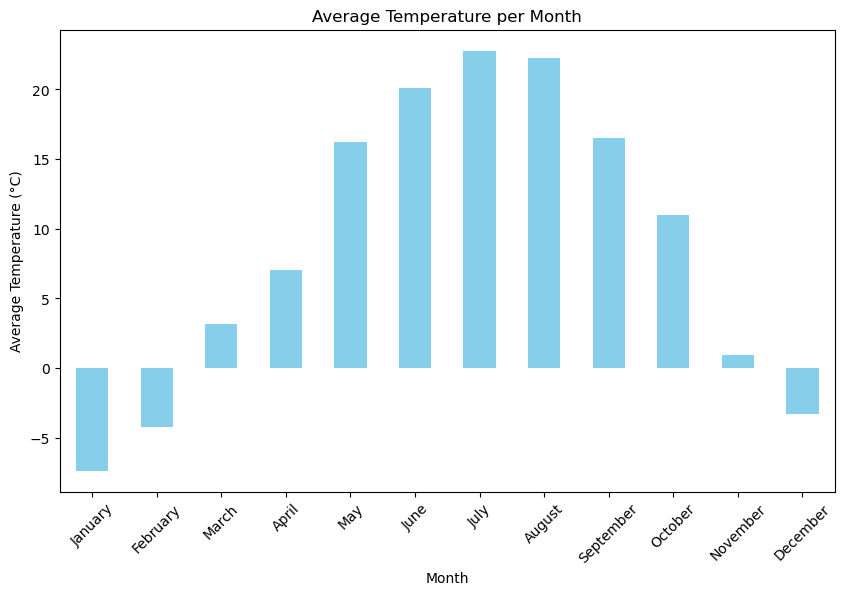

In [189]:
plt.figure(figsize=(10, 6))
avg_temp_by_month_name.plot(kind='bar', color='skyblue')
plt.title('Average Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

### 7. 💨 Seasonal Analysis of Wind Speed

#### Calculating the average wind speed per month

In [195]:
avg_wind_speed_by_month = data.groupby('Month')['Wind Speed_km/h'].mean()

In [197]:
avg_wind_speed_by_month

Month
1     18.108871
2     14.837644
3     14.514785
4     17.369444
5     12.846774
6     14.681944
7     11.887097
8     13.931452
9     14.108333
10    15.475806
11    13.973611
12    17.614247
Name: Wind Speed_km/h, dtype: float64

In [199]:
import calendar

##### Extracting the month from the Date/Time column and converting it to month names

In [204]:
data['Month'] = data['Date/Time'].dt.month
data['Month_Name'] = data['Month'].apply(lambda x: calendar.month_name[x])

#### Calculating the average wind speed per month by name

In [209]:
avg_wind_speed_by_month_name = data.groupby('Month_Name')['Wind Speed_km/h'].mean()

#### To ensure the months are in the correct order

In [212]:
avg_wind_speed_by_month_name = avg_wind_speed_by_month_name.reindex(calendar.month_name[1:])

In [214]:
avg_wind_speed_by_month_name

Month_Name
January      18.108871
February     14.837644
March        14.514785
April        17.369444
May          12.846774
June         14.681944
July         11.887097
August       13.931452
September    14.108333
October      15.475806
November     13.973611
December     17.614247
Name: Wind Speed_km/h, dtype: float64

#### Visualization: Average Wind Speed per Month

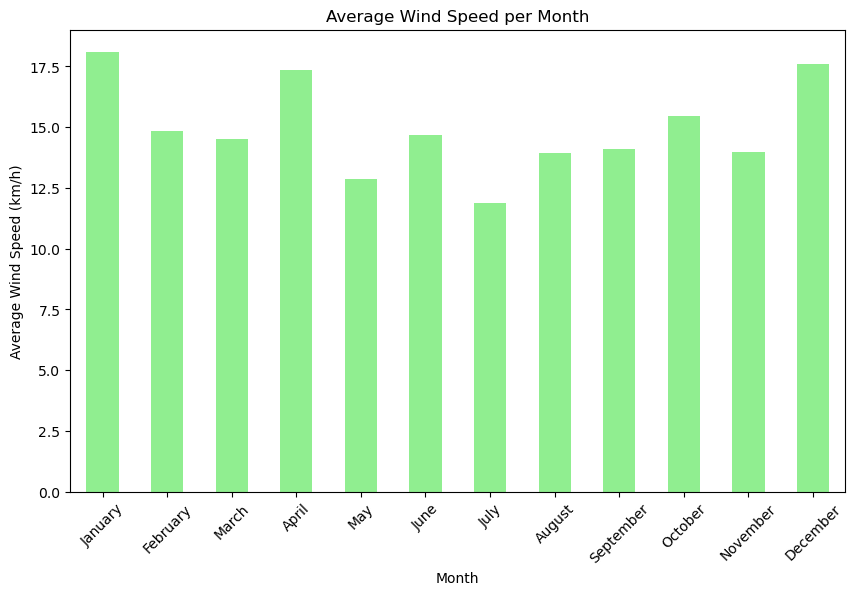

In [217]:
plt.figure(figsize=(10, 6))
avg_wind_speed_by_month_name.plot(kind='bar', color='lightgreen')
plt.title('Average Wind Speed per Month')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.show()

### 8. ⛅ Analysis of Weather Conditions

#### Analyzing the frequency of different weather conditions

In [223]:
weather_condition_counts = data['Weather'].value_counts()

In [227]:
weather_condition_counts.head(10)

Weather
Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Clear            1326
Snow              390
Rain              306
Rain Showers      188
Fog               150
Rain,Fog          116
Drizzle,Fog        80
Name: count, dtype: int64

#### Visualization: Weather Conditions Frequency

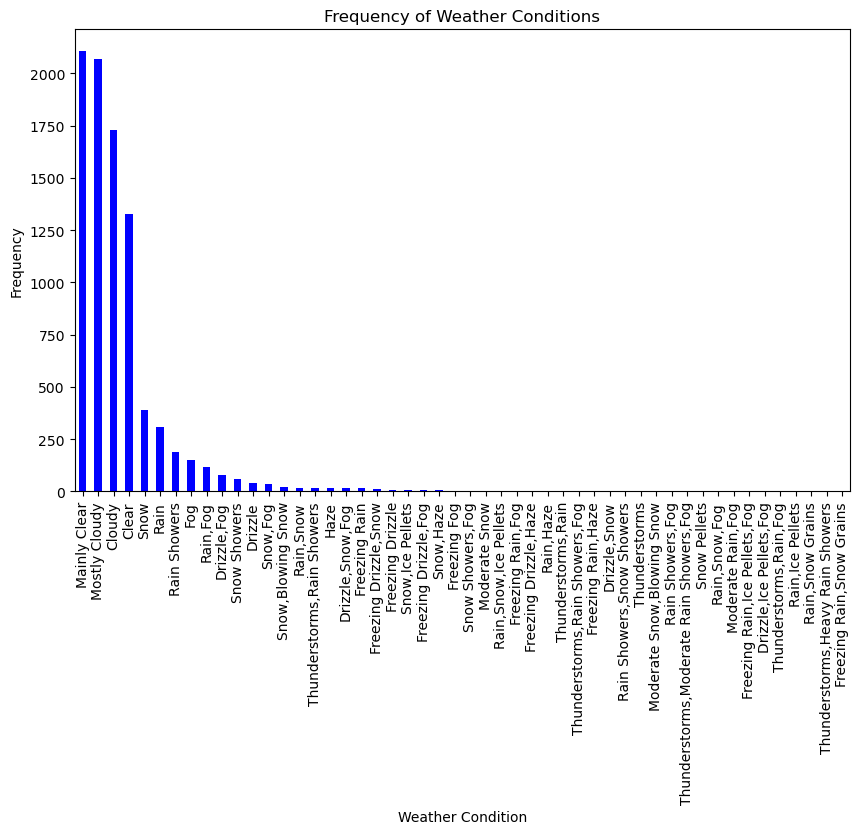

In [230]:
plt.figure(figsize=(10, 6))
weather_condition_counts.plot(kind='bar', color='blue')
plt.title('Frequency of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()

### 9. 🌡️ Humidity and Temperature Trends Over Time

#### Aggregating average temperature and humidity by day

In [236]:
temp_humidity_trends = data.groupby(data['Date/Time'].dt.date)[['Temp_C', 'Rel Hum_%']].mean()

In [238]:
temp_humidity_trends.head()

,Temp_C,Rel Hum_%
Date/Time,,
2012-01-01,0.629167,86.125000
2012-01-02,0.041667,63.083333
2012-01-03,-14.416667,54.791667
2012-01-04,-13.645833,62.875000
2012-01-05,-6.750000,70.000000


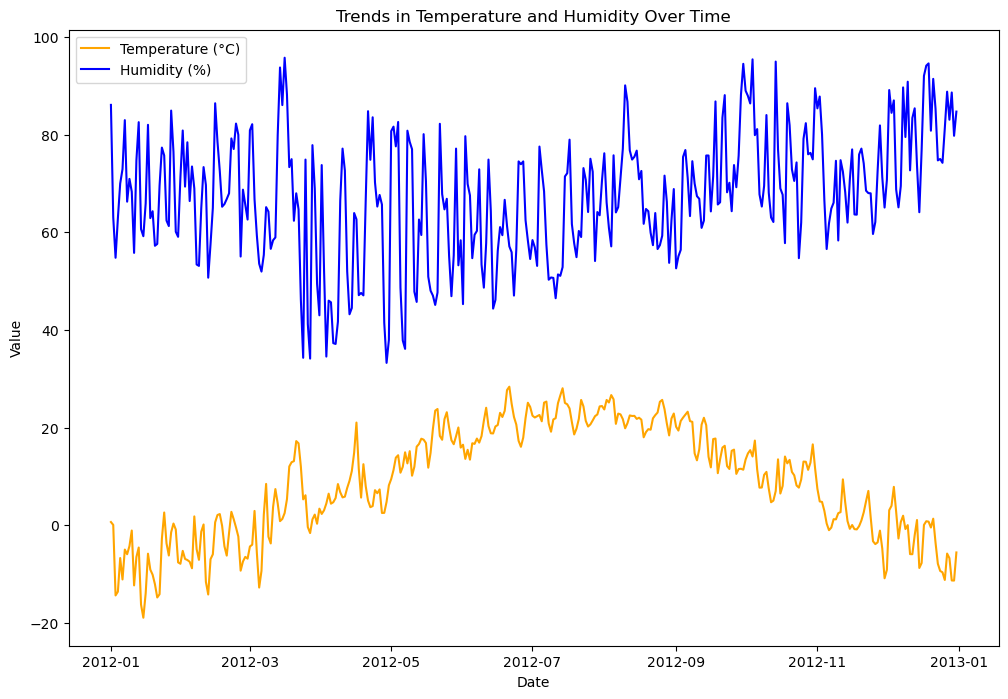

In [240]:
plt.figure(figsize=(12, 8))
plt.plot(temp_humidity_trends.index, temp_humidity_trends['Temp_C'], label='Temperature (°C)', color='orange')
plt.plot(temp_humidity_trends.index, temp_humidity_trends['Rel Hum_%'], label='Humidity (%)', color='blue')
plt.title('Trends in Temperature and Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### 🎯 Conclusion
The analysis of weather data reveals key insights into temperature patterns, the relationship between temperature and humidity, wind speed, visibility, and atmospheric pressure. By leveraging visualizations, we can effectively identify trends and correlations that may be essential for forecasting and understanding weather dynamics

####  George Zacharia
Data Analyst